**Exercise 2.1** 

In the comparison shown in Figure 2.1, which method will
perform best in the long run in terms of cumulative reward and cumulative
probability of selecting the best action? How much better will it be? Express
your answer quantitatively.

As the final timestep $\Tau$ goes to infinity, the $\varepsilon = 0.01$-greedy method is the best in both the cumulative reward and cumulative probability of selecting the best action 

Suppose we denote $\tau_{\varepsilon}$ the timestep at which the $\varepsilon$-greedy method has explored enough so that it knows which action is the best. <br> 
$\tau_{\varepsilon}$ depends on $\varepsilon$ and on the problem, but is certainly much smaller compared to $\Tau$ as $\Tau \rightarrow \infty$. <br>
Then from that timestep $\tau_{\varepsilon}$ onwards, this method will mostly select the best action. For $\varepsilon=0.01$ it will select the best action 99% of the time, eventually beating bigger values of $\varepsilon$ that would find the best action faster but do worse in the long run. To give quantify how much better it will be, let us introduce :
- $\Tau$ a fixed final timestep
- $a^*$ the best action
- $q(a^*)$ the reward associated to the best action
- $G_{\epsilon}$ the cumulated reward at final timestep $\Tau$ associated the $\epsilon$-greedy method
- Two parameter values such that $\varepsilon_1 > \varepsilon_2$ and their respective "convergence timestep" respect the following condition $\tau_{\varepsilon_1} < \tau_{\varepsilon_2}$ <br>


Finding $\tau_{\varepsilon_1}, \tau_{\varepsilon_2}$ is not trivial, but after these timesteps we can quantify the cumulative reward and probability :
- For $\varepsilon_1$, the method will choose the best action at least $(\Tau - \tau_{\varepsilon_1}) (1 - \varepsilon_1)$ times (in expectation)<br>
  therefore yielding at least $\bar{G_{\varepsilon_1}} := (\Tau - \tau_{\varepsilon_1}) (1 - \varepsilon_1) q(a^*)$ cumulative reward and will select the best action at least $\frac{(\Tau - \tau_{\varepsilon_1})}{\Tau} (1 - \varepsilon_1)$ of the time
- For $\varepsilon_2$, the method will yield at least $\bar{G_{\varepsilon_2}} := (\Tau - \tau_{\varepsilon_2}) (1 - \varepsilon_2) q(a^*)$ cumulative reward and take the best action at least $\frac{(\Tau - \tau_{\varepsilon_2})}{\Tau} (1 - \varepsilon_2)$ of the time

Comparing $\bar{G_{\varepsilon_1}}$ and $\bar{G_{\varepsilon_2}}$ gives :
\begin{align*}
    \bar{G_{\varepsilon_1}} &< \bar{G_{\varepsilon_2}} \\
    \Leftrightarrow (\Tau - \tau_{\varepsilon_1})(1-\varepsilon_1)q(a) &< (\Tau - \tau_{\varepsilon_2})(1-\varepsilon_2)q(a) \\
    \Leftrightarrow (\Tau - \tau_{\varepsilon_1})(1-\varepsilon_1) &< (\Tau - \tau_{\varepsilon_2})(1-\varepsilon_2) \\
    \Leftrightarrow \frac{\Tau - \tau_{\varepsilon_1}}{\Tau - \tau_{\varepsilon_2}} &< \frac{1-\varepsilon_2}{1-\varepsilon_1}
\end{align*}

Notice that these fractions are always $> 1$ because $1 > \varepsilon_1 > \varepsilon_2$ > 0 and $0 < \tau_{\varepsilon_1} < \tau_{\varepsilon_2} < \Tau$

For example if $\varepsilon_1 = 0.10$ and $\varepsilon_2 = 0.01$, then the right-hand side would be equal to $\frac{1-0.01}{1-0.10} = 0.99/0.90 \approx 1.01 =: \rho$. <br>
The inequality holds as long as the left-hand side is $< \rho$, which is true when :
\begin{align*}
    \Tau - \tau_{\epsilon_1} &< \rho (\Tau - \tau_{\epsilon_2}) \\
    \Leftrightarrow (\rho-1)\Tau &> \rho \tau_{\epsilon_2} - \tau_{\epsilon_1} \\
    \Leftrightarrow \Tau &> \frac{-\rho \tau_{\epsilon_2} + \tau_{\epsilon_1}}{\rho-1}
\end{align*}
The way we can interpret this is, we need $\Tau$ to be large enough so that the cumulative rewards $\bar{G_{\varepsilon_1}} < \bar{G_{\varepsilon_2}}$ (after timestep $\tau_{\epsilon}$). <br>
To give a more precise condition, we'd have to find an expression for $\tau_{\epsilon}$, and we'd also have to consider the random cumulated rewards from timestep 0 to $\tau_{\epsilon}$

**Exercise 2.2**

Give pseudocode for a complete algorithm for the n-armed
bandit problem. Use greedy action selection and incremental computation of
action values with $α = \frac{1}{k}$
step-size parameter. Assume a function bandit(a)
that takes an action and returns a reward. Use arrays and variables; do not subscript anything by the time index t (for examples of this style of pseudocode, see Figures 4.1 and 4.3). Indicate how the action values are initialized
and updated after each reward. Indicate how the step-size parameters are set
for each action as a function of how many times it has been tried

Wrote a Python implementation (a little different from incremental computation) in the folder. <br>
Here's the pseudo code for incremental computation :

### Pseudo Code

```
input T, n_arms, alpha function k : 1/k

Initialize Q <- array(length=T) of array(length=n_arms)
Q[0,:] <- 0
Initialize N <- array(length=n_arms)
N[:] <- 0
for t = 1, ..., T :
    A <- argmax(Q[t-1,:]) (with ties broken randomly)
    R <- bandit(A)
    N[A] <- N[A] + 1
    Q[t, A] = Q[t-1, A] + alpha(N[A]) * (R - Q[t, A])
return Q
```


**Exercise 2.3** 

If the step-size parameters, $α_k$, are not constant, then the estimate $Q_k$ is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of $α_k$?

**Exercise 2.4 (programming)**

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary
problems. <br> 
Use a modified version of the 10-armed testbed in which all the $q(a)$ start out equal and then take independent random walks. <br> 
Prepare plots like Figure 2.1 for an action-value method using sample averages, incrementally computed by $α = \frac{1}{k}$, and another action-value method using a constant step-size parameter, $α = 0.1$. Use $ε = 0.1$ and, if necessary, runs longer than 1000 plays.


100%|██████████| 1000/1000 [00:46<00:00, 21.35it/s]


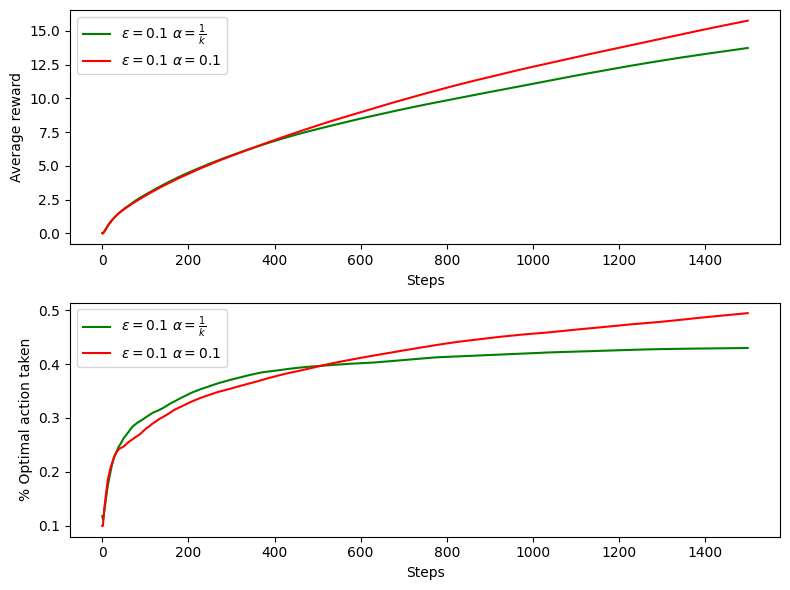

In [1]:
from NonStationary import *


N_ARMS = 10
TIMESTEPS = 1500
N_BANDITS = 1000
RANDOM_WALK_STD = 0.5

env = NonStarionaryBandit(
    n=N_ARMS,
    random_walk_std=RANDOM_WALK_STD
)
strats = [
    EpsilonGreedy(epsilon=0.1, alpha=(lambda k : 1/k), timesteps=TIMESTEPS, name=r"$\epsilon = 0.1$ $\alpha=\frac{1}{k}$"),
    EpsilonGreedy(epsilon=0.1, alpha=(lambda k : 0.1), timesteps=TIMESTEPS, name=r"$\epsilon = 0.1$ $\alpha=0.1$"),
]
colors = ['green', 'red']
if not(os.path.exists("figures/")):
    os.mkdir("figures/")
    
run_experiment(env, strats, N_BANDITS, TIMESTEPS, colors, False)

With a decreasing stepsize, the method struggles to follow the non-stationary arm value.

**Exercise 2.5**

The results shown in Figure 2.2 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of
the curve for the optimistic method? What might make this method perform
particularly better or worse, on average, on particular early plays?

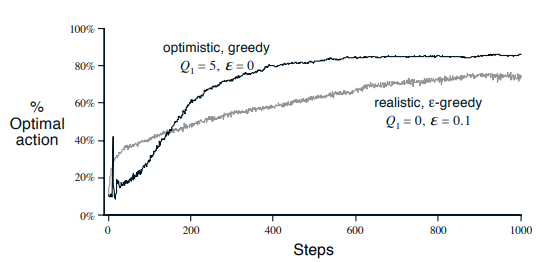

Because of optimistic initial action value, the greedy algorithm explores all moves at least once. <br>
The early exploration quickly decreases the optimistic value estimation starting at 5, but the best action should decrease the least out of the 10 actions (+ a little bit of luck). So if the method's lucky, it will start with the best action at the early stages After all, it is the best action. <br> 
But as the method quickly realizes the value isn't nearly close to +5, it keeps decreasing and once it's below other action-value estimations, it tries other actions thus the % of optimal action quickly drops. Then the algorithm proceeds to keep exploring all actions until their value estimation becomes realistic.

**Exercise 2.6** 

Suppose you face a binary bandit task whose true action values
change randomly from play to play. Specifically, suppose that for any play the
true values of actions 1 and 2 are respectively 0.1 and 0.2 with probability 0.5
(case A), and 0.9 and 0.8 with probability 0.5 (case B). If you are not able to
tell which case you face at any play, what is the best expectation of success
you can achieve and how should you behave to achieve it? 

If we were not able to tell which case we were to face at any play, then the mean reward for taking action 1 is :
- $\mathbb{E}[q(1)] = \mathbb{P}(\text{case A}) \ \mathbb{E}[q(1)|\text{case A}] + \mathbb{P}(\text{case B}) \ \mathbb{E}[q(1)|\text{case B}] = 0.5 \times 0.1 + 0.5 \times 0.9 = 0.5$
- For action 2, it also is $0.5 \times 0.2 + 0.5 \times 0.8 = 0.5$

So both actions yield the same reward of 0.5 in expectation, even though we're not supposed to know this, but there is no better action. <br>
The best we can do is to use the $\varepsilon$-greedy algorithm with constant stepsize

Now suppose that on each play you are told if you are facing case A or case B (although you still
don’t know the true action values). This is an associative search task. What
is the best expectation of success you can achieve in this task, and how should
you behave to achieve it?

If we knew the case we were facing, then :
- in case A, the best expectation of success is taking action 2 with a mean reward of 0.2
- in case B, the best expectation of success is taking action 1 with a mean reward of 0.9
  
To achieve this, we could run (for example) 2 UCB algorithms independently, one for each case, both would yield their own optimal policy.